#Data 102 Final Project
###Group Members: Frances Hogg, Sana Pandey, Justin Wong, Bilguun Amarbayar


##Data Loading

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import arviz as az

In [ ]:
#Data storage pathway
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/data102'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1niynpQypFLYJT5k-R5qcwouko9bXf_eS/data102


In [ ]:
#Loading datasets (including supplemental)

#Primary dataset:
#dem_candidates.csv from primary-candidates-2018
dem_elect_link = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/dem_candidates.csv'
dem_elect_df = pd.read_csv(dem_elect_link)
# Dataset is now stored in a Pandas Dataframe
#rep_candidates.csv from primary-candidates-2018
rep_elect_link = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/rep_candidates.csv'
rep_elect_df = pd.read_csv(rep_elect_link, encoding='latin-1') #encoded in latin-1 to fix unicode error

##Data Processing and Cleaning

In [ ]:
#Turning all NaN values into "no" for endorsements, Democratic df
dem_elect_df['Biden Endorsed?'] = dem_elect_df['Biden Endorsed?'].fillna('No')
dem_elect_df['Party Support?'] = dem_elect_df['Party Support?'].fillna('No')
dem_elect_df['Emily Endorsed?'] = dem_elect_df['Emily Endorsed?'].fillna('No')
dem_elect_df['Guns Sense Candidate?'] = dem_elect_df['Guns Sense Candidate?'].fillna('No')
dem_elect_df['Warren Endorsed? '] = dem_elect_df['Warren Endorsed? '].fillna('No')
dem_elect_df['Sanders Endorsed?'] = dem_elect_df['Sanders Endorsed?'].fillna('No')
dem_elect_df['Our Revolution Endorsed?'] = dem_elect_df['Our Revolution Endorsed?'].fillna('No')
dem_elect_df['Justice Dems Endorsed?'] = dem_elect_df['Justice Dems Endorsed?'].fillna('No')
dem_elect_df['PCCC Endorsed?'] = dem_elect_df['PCCC Endorsed?'].fillna('No')
dem_elect_df['Indivisible Endorsed?'] = dem_elect_df['Indivisible Endorsed?'].fillna('No')
dem_elect_df['WFP Endorsed?'] = dem_elect_df['WFP Endorsed?'].fillna('No')
dem_elect_df['VoteVets Endorsed?'] = dem_elect_df['VoteVets Endorsed?'].fillna('No')
dem_elect_df['No Labels Support?'] = dem_elect_df['No Labels Support?'].fillna('No')
dem_elect_df['Veteran?'] = dem_elect_df['Veteran?'].fillna('No')
dem_elect_df['LGBTQ?'] = dem_elect_df['LGBTQ?'].fillna('No')
dem_elect_df['Elected Official?'] = dem_elect_df['Elected Official?'].fillna('No')
dem_elect_df['STEM?'] = dem_elect_df['STEM?'].fillna('No')
dem_elect_df['Obama Alum?'] = dem_elect_df['Obama Alum?'].fillna('No')

In [ ]:
#Dropping columns "Primary Runoff Status" and "General Status"
dem_elect_df.drop(columns=['Primary Runoff Status', 'General Status'], inplace=True)

In [ ]:
#Drop all rows that don't have a value for "Won Primary" or "Primary %"
dem_elect_df = dem_elect_df[dem_elect_df['Primary %'].notna()]
dem_elect_df = dem_elect_df[dem_elect_df['Won Primary'].notna()]

In [ ]:
#Turning all NaN values into "no" for endorsements, Republican df
rep_elect_df['Rep Party Support?'] = rep_elect_df['Rep Party Support?'].fillna('No')
rep_elect_df['Trump Endorsed?'] = rep_elect_df['Trump Endorsed?'].fillna('No')
rep_elect_df['Bannon Endorsed?'] = rep_elect_df['Bannon Endorsed?'].fillna('No')
rep_elect_df['Great America Endorsed?'] = rep_elect_df['Great America Endorsed?'].fillna('No')
rep_elect_df['NRA Endorsed?'] = rep_elect_df['NRA Endorsed?'].fillna('No')
rep_elect_df['Right to Life Endorsed?'] = rep_elect_df['Right to Life Endorsed?'].fillna('No')
rep_elect_df['Susan B. Anthony Endorsed?'] = rep_elect_df['Susan B. Anthony Endorsed?'].fillna('No')
rep_elect_df['Club for Growth Endorsed?'] = rep_elect_df['Club for Growth Endorsed?'].fillna('No')
rep_elect_df['Koch Support?'] = rep_elect_df['Koch Support?'].fillna('No')
rep_elect_df['House Freedom Support?'] = rep_elect_df['House Freedom Support?'].fillna('No')
rep_elect_df['Tea Party Endorsed?'] = rep_elect_df['Tea Party Endorsed?'].fillna('No')
rep_elect_df['Main Street Endorsed?'] = rep_elect_df['Main Street Endorsed?'].fillna('No')
rep_elect_df['Chamber Endorsed?'] = rep_elect_df['Chamber Endorsed?'].fillna('No')
rep_elect_df['No Labels Support?'] = rep_elect_df['No Labels Support?'].fillna('No')

In [ ]:
#Dropping columns "Primary Runoff Status" and "General Status"
rep_elect_df.drop(columns=['Primary Runoff Status', 'General Status'], inplace=True)

In [ ]:
#Drop all rows that don't have a value for "Primary %"
rep_elect_df = rep_elect_df[rep_elect_df['Primary %'].notna()]

In [ ]:
#Reading in the financing data for swing states Nevada, Arizona, Wisconsin, Michigan

swingState1 = pd.read_csv("NevadaArizonaWisconsinMichigan.csv")
swingState1[["committee_id", "committee_name", "candidate_name",
             "contributor_name", "contributor_state",
             "contribution_receipt_amount"]]

<ipython-input-135-6620de0a4486>:3: DtypeWarning: Columns (12,15,25,31,37,38,39,40,41,42,43,44,45,46,47,50,51,52,53,54,56,59,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  swingState1 = pd.read_csv("NevadaArizonaWisconsinMichigan.csv")


,committee_id,committee_name,candidate_name,contributor_name,contributor_state,contribution_receipt_amount
0,C00492785,TED CRUZ FOR SENATE,NaN,"GUETZ, MICHAEL",AZ,500.00
1,C00500199,WILLIAMSON FOR U S CONGRESS,NaN,"DECKER, DEBRA",AZ,9.41
2,C00492785,TED CRUZ FOR SENATE,NaN,"WINGATE, MONROE J. MR.",AZ,250.00
3,C00665554,JACKSON-US SENATE,NaN,"ROGERS, NORMAN",NV,500.00
4,C00665554,JACKSON-US SENATE,NaN,"PURDY, CHARLES E",WI,100.00
...,...,...,...,...,...,...
358239,C00575548,CATHERINE CORTEZ MASTO FOR SENATE,NaN,"CALLAGHAN, CAROL",MI,50.00
358240,C00575548,CATHERINE CORTEZ MASTO FOR SENATE,NaN,"BROTHWELL, CHARLOTTE",NV,10.00
358241,C00575548,CATHERINE CORTEZ MASTO FOR SENATE,NaN,"SOLIMAN, JOYCE M.",WI,50.00
358242,C00575548,CATHERINE CORTEZ MASTO FOR SENATE,NaN,"FERGUSON, BARBARA",NV,35.00


In [ ]:
#Reading in the financing data for swing states Pennyslyvania, North Carolina, Georgia States

swingState2 = pd.read_csv("PennsylvaniaNorthCarolinaGeorgia.csv")
swingState2[["committee_id", "committee_name", "candidate_name",
             "contributor_name", "contributor_state",
             "contribution_receipt_amount"]]

<ipython-input-136-14d8b1df124a>:3: DtypeWarning: Columns (15,25,31,37,38,39,40,41,42,43,44,45,46,47,50,51,52,53,54,56,59) have mixed types. Specify dtype option on import or set low_memory=False.
  swingState2 = pd.read_csv("PennsylvaniaNorthCarolinaGeorgia.csv")


,committee_id,committee_name,candidate_name,contributor_name,contributor_state,contribution_receipt_amount
0,C00492785,TED CRUZ FOR SENATE,NaN,"SINHA-FRAZER, NEERA K.",GA,30.0
1,C00492785,TED CRUZ FOR SENATE,NaN,"SINHA-FRAZER, NEERA K.",GA,-30.0
2,C00492785,TED CRUZ FOR SENATE,NaN,"REINHARD, DONALD MR.",PA,500.0
3,C00492785,TED CRUZ FOR SENATE,NaN,"REINHARD, DONALD MR.",PA,500.0
4,C00492785,TED CRUZ FOR SENATE,NaN,"REINHARD, DONALD MR.",PA,-500.0
...,...,...,...,...,...,...
295951,C00575548,CATHERINE CORTEZ MASTO FOR SENATE,NaN,"JOHNSON, MARCIA",PA,100.0
295952,C00575548,CATHERINE CORTEZ MASTO FOR SENATE,NaN,"PILDER, STEPHEN",PA,2.5
295953,C00575548,CATHERINE CORTEZ MASTO FOR SENATE,NaN,"PILDER, STEPHEN",PA,5.0
295954,C00575548,CATHERINE CORTEZ MASTO FOR SENATE,NaN,"FANGBONER, RAYMOND",PA,200.0


In [ ]:
#Adding last name column to dem_elect_df and rep_elect_df
import re
def extract_last_name(full_name):
    match = re.search(r'(?<=\s)\b[A-Za-z]+$', full_name)
    if match:
        return match.group(0)
    else:
        return None

dem_elect_df['Last Name'] = dem_elect_df['Candidate'].apply(extract_last_name)
rep_elect_df['Last Name'] = rep_elect_df['Candidate'].apply(extract_last_name)

In [ ]:
#Adding columns "Donation Sum" and "Donation Count"
donation_sum = []
donation_count = []

swingState1_grouped = swingState1.groupby('committee_name').agg({'contribution_receipt_amount': 'sum'}).reset_index()
swingState2_grouped = swingState2.groupby('committee_name').agg({'contribution_receipt_amount': 'sum'}).reset_index()

def get_sum(last_name):
    return swingState1_grouped[swingState1_grouped['committee_name'].str.contains(last_name, case=False)]['contribution_receipt_amount'].sum() + swingState2_grouped[swingState2_grouped['committee_name'].str.contains(last_name, case=False)]['contribution_receipt_amount'].sum()
def get_count(last_name):
    return len(swingState1_grouped[swingState1_grouped['committee_name'].str.contains(last_name, case=False)]['contribution_receipt_amount']) + len(swingState2_grouped[swingState2_grouped['committee_name'].str.contains(last_name, case=False)]['contribution_receipt_amount'])

#for Democratic df
for i in dem_elect_df['Last Name']:
    summ = get_sum(str(i))
    count = get_count(str(i))
    donation_sum.append(summ)
    donation_count.append(count)

dem_elect_df['Donation Sum'] = donation_sum
dem_elect_df['Donation Count'] = donation_count
dem_elect_df['Donation Average'] = dem_elect_df['Donation Sum']/dem_elect_df['Donation Count']

#for Republican df
don_sum = []
don_count = []

for i in rep_elect_df['Last Name']:
    summ = get_sum(str(i))
    count = get_count(str(i))
    don_sum.append(summ)
    don_count.append(count)

rep_elect_df['Donation Sum'] = don_sum
rep_elect_df['Donation Count'] = don_count
rep_elect_df['Donation Average'] = rep_elect_df['Donation Sum']/rep_elect_df['Donation Count']

In [ ]:
#Adding a column called "Endorsement Sum" that gives the number of endorsements for each candidate
endorsed_columns = dem_elect_df.filter(like='Endorsed')
endorsement_sum = endorsed_columns.eq('Yes').sum(axis=1)

dem_elect_df['Endorsement Sum'] = endorsement_sum

dem_elect_df['Endorsement Sum'].value_counts()

endorse_cols = rep_elect_df.filter(like='Endorsed')
endorse_sum = endorse_cols.eq('Yes').sum(axis=1)

rep_elect_df['Endorsement Sum'] = endorsement_sum

rep_elect_df['Endorsement Sum'].value_counts()

Endorsement Sum
0.0    549
1.0    129
2.0     48
3.0     16
4.0      8
5.0      1
Name: count, dtype: int64

In [ ]:
#Adding a party column to the Republican and Democratic dfs for ease of reference

rep_elect_df['Party'] = 'Republican'
dem_elect_df['Party'] = 'Democrat'

In [ ]:
# import and convert the states into their state abreviation and classifies which states are very red, very blue, and etc
states = pd.read_csv('States.txt', sep='\t')

states['Republican/lean Rep.'] = pd.to_numeric(states['Republican/lean Rep.'].str.rstrip('%'))
states['Democrat/lean Dem.'] = pd.to_numeric(states['Democrat/lean Dem.'].str.rstrip('%'))
states['diff'] = (states['Republican/lean Rep.'] -
                  states['Democrat/lean Dem.'])
states['No lean'] = pd.to_numeric(states['No lean'].str.rstrip('%'))

very_blue_states = states[states['diff'] <= -14]['State'].values
very_red_states = states[states['diff'] >= 5]['State'].values
most_no_lean_states = states[states['No lean'] >= 19]['State'].values
blue_states = states[states['diff'] < 0]['State'].values
red_states = states[states['diff'] > 0]['State'].values
neutral_states = states[(states['diff'] >= -3) & (states['diff'] <= 3)]['State'].values
battleground_states = ['Nevada', 'Arizona', 'Wisconsin',
                       'Michigan', 'Pennsylvania',
                       'North Carolina', 'Georgia']

usa_states = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "District of Columbia" : "DC", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN",
    "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI",
    "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT",
    "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC",
    "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR",
    "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

states['State Code'] = states['State'].map(usa_states)

democrat_leaning = states[states['diff'] < -6]['State Code']
republican_leaning = states[states['diff'] > 6]['State Code']
battleground = states[(states['diff'] >= -6) &
 (states['diff'] <= 6)]['State Code']

state_partisan_lean = {'Democrat-leaning': democrat_leaning,
                       'Republican-leaning': republican_leaning,
                       'Battleground': battleground}

##Visualizations

In [ ]:
dem_elect_df.head(2)

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Partisan Lean,Primary %,Won Primary,...,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,Last Name,Donation Sum,Donation Count,Donation Average,Endorsement Sum,Party
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,-28.879999,3.42,No,...,No,No,No,No,None,0.0,0,NaN,0,Democrat
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,-28.879999,1.74,No,...,No,No,No,No,Countryman,0.0,0,NaN,0,Democrat


In [ ]:
columns_of_interest = ['Candidate', 'State', 'District', 'Office Type',
                       'Race Type', 'Primary Status', 'Primary %',
                       'Won Primary', 'Donation Sum', 'Party']

In [ ]:
donations_and_primary = pd.concat([dem_elect_df[columns_of_interest],
                                   rep_elect_df[columns_of_interest]],
                                  axis=0)

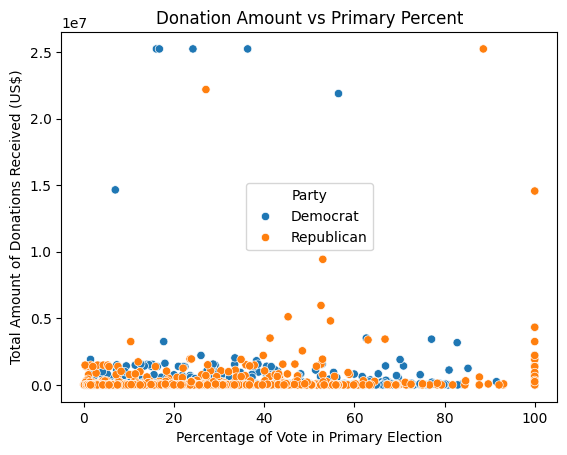

In [ ]:
#Comparing Donation Amount to the Primary Percent of Vote
sns.scatterplot(donations_and_primary, x='Primary %', y='Donation Sum',
                hue='Party')
plt.title('Donation Amount vs Primary Percent')
plt.xlabel('Percentage of Vote in Primary Election')
plt.ylabel('Total Amount of Donations Received (US$)')
plt.show()

In [ ]:
nonzero_donations_and_primary = donations_and_primary[donations_and_primary['Donation Sum'] > 0]
nonzero_donations_and_primary['Donation Sum (Log)'] = np.log(nonzero_donations_and_primary['Donation Sum'])

<ipython-input-146-57581e140ba0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzero_donations_and_primary['Donation Sum (Log)'] = np.log(nonzero_donations_and_primary['Donation Sum'])


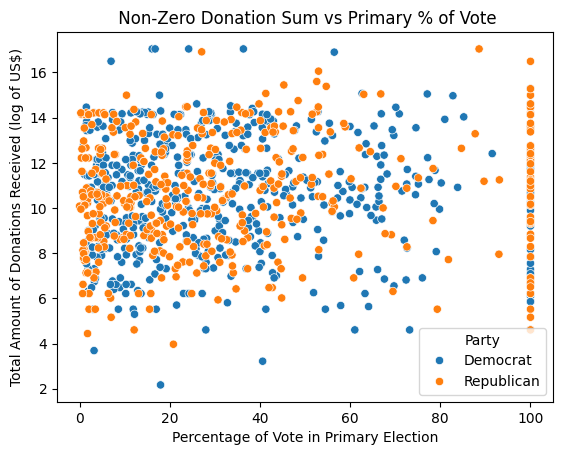

In [ ]:
#Comparing non-zero donation amounts against Primary % for Republicans and Democrats
sns.scatterplot(nonzero_donations_and_primary, x='Primary %', y='Donation Sum (Log)',
                hue='Party')
plt.title(' Non-Zero Donation Sum vs Primary % of Vote')
plt.xlabel('Percentage of Vote in Primary Election')
plt.ylabel('Total Amount of Donations Received (log of US$)')
plt.show()

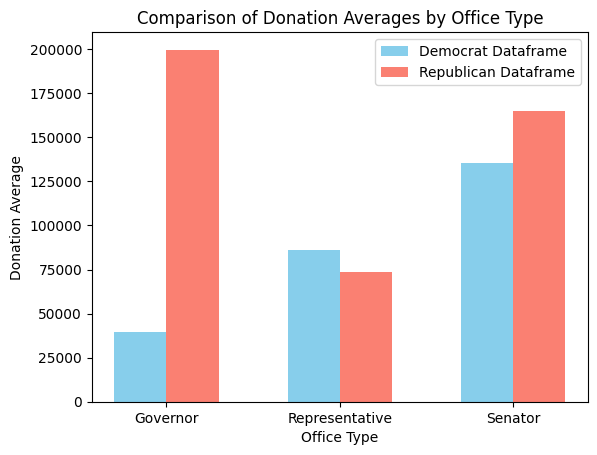

In [ ]:
#Comparing average donation amounts across race types and party
by_office_rep = rep_elect_df.groupby('Office Type').agg({'Donation Average': 'mean'}).reset_index()
by_office_dem = dem_elect_df.groupby('Office Type').agg({'Donation Average': 'mean'}).reset_index()

office_types = by_office_dem['Office Type']
donation_averages = by_office_dem['Donation Average']
donation_averages2 = by_office_rep['Donation Average']

bar_width = 0.3

x = np.arange(len(office_types))

fig, ax = plt.subplots()

ax.bar(x - bar_width/2, donation_averages, bar_width, label='Democrat Dataframe', color='skyblue')

ax.bar(x + bar_width/2, donation_averages2, bar_width, label='Republican Dataframe', color='salmon')

ax.set_xlabel('Office Type')
ax.set_ylabel('Donation Average')
ax.set_title('Comparison of Donation Averages by Office Type')
ax.set_xticks(x)
ax.set_xticklabels(office_types)
ax.legend()

plt.show()

In [ ]:
avg_donation_by_party = (donations_and_primary.groupby(['Party', 'Won Primary'])
                                              .mean(numeric_only=True)
                                              .reset_index())

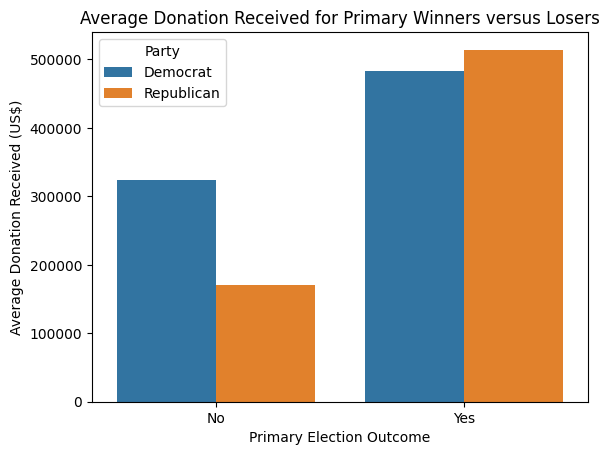

In [ ]:
sns.barplot(avg_donation_by_party,
            x='Won Primary',
            y='Donation Sum',
            hue='Party')
plt.ylabel('Average Donation Received (US$)')
plt.xlabel('Primary Election Outcome')
plt.title('Average Donation Received for Primary Winners versus Losers')
plt.show()

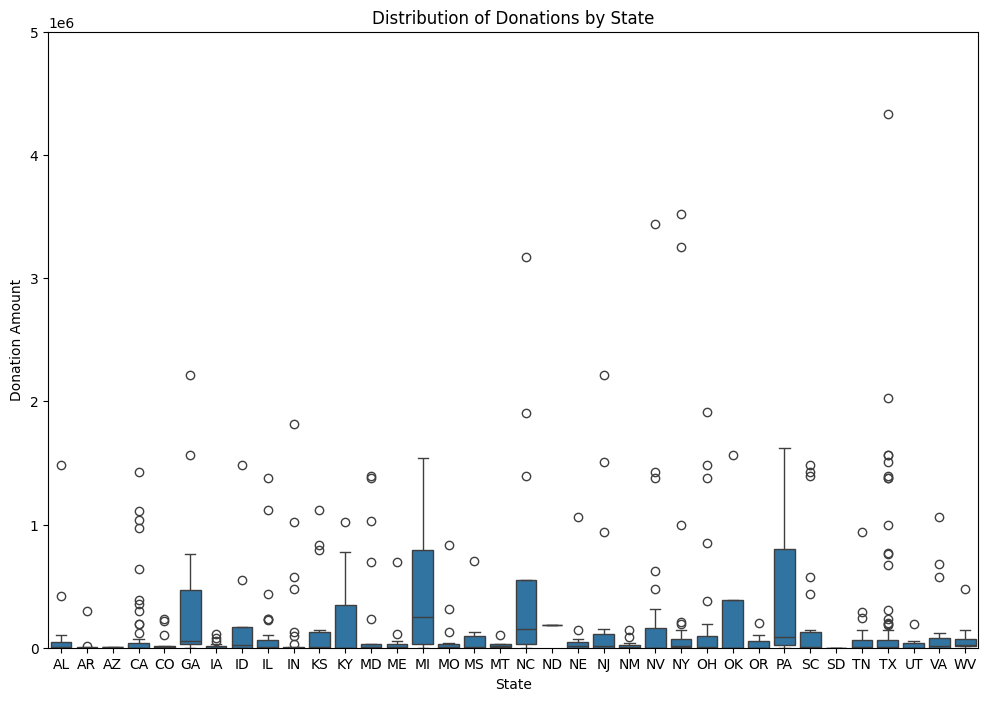

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))

sns.boxplot(x='State', y='Donation Sum', data=dem_elect_df)
plt.title('Distribution of Donations by State')
plt.ylim(0, 5000000)
plt.xlabel('State')
plt.ylabel('Donation Amount')

plt.show()

##Research Question 1: Prediction with GLMs and nonparametric methods
How well does partisan lean and primary percent perform as predictors of the donation sum of a given candidate? And, how does conditioning by state impact their success as predictors?

In [ ]:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

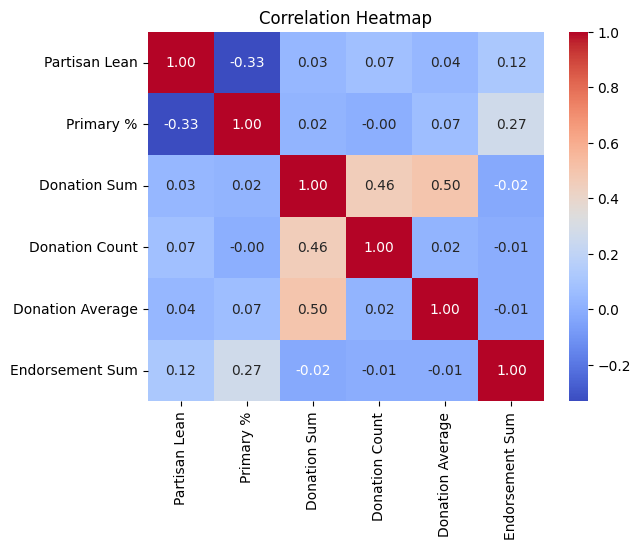

In [ ]:
#Correaltion Map
numeric_columns = dem_elect_df.select_dtypes(include='number')

corr_matrix = numeric_columns.corr()
correlation = numeric_columns.corrwith(dem_elect_df['Donation Sum']).sort_values(ascending=False)

correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Party Support?', ylabel='Count'>

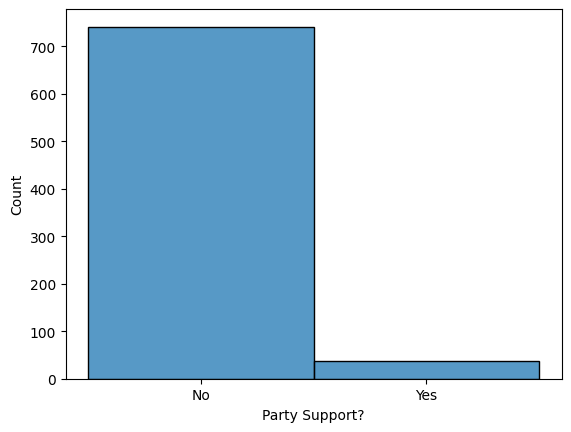

In [ ]:
#Histogram of Party Support column
sns.histplot(x=dem_elect_df["Party Support?"])

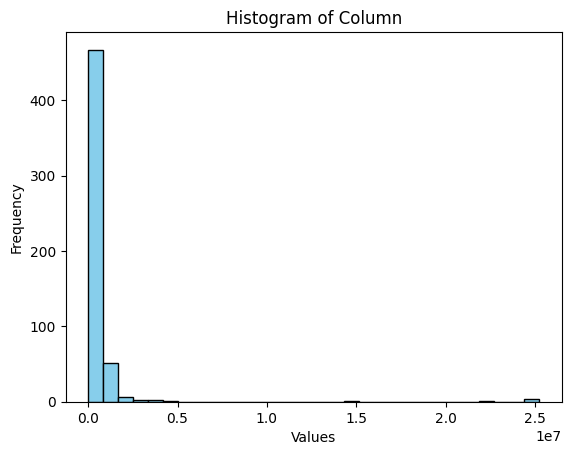

In [ ]:
#Histogram of Donation Sum
column_data = dem_elect_df[dem_elect_df['Donation Sum']>0]['Donation Sum']
plt.hist(column_data, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column')
plt.show()

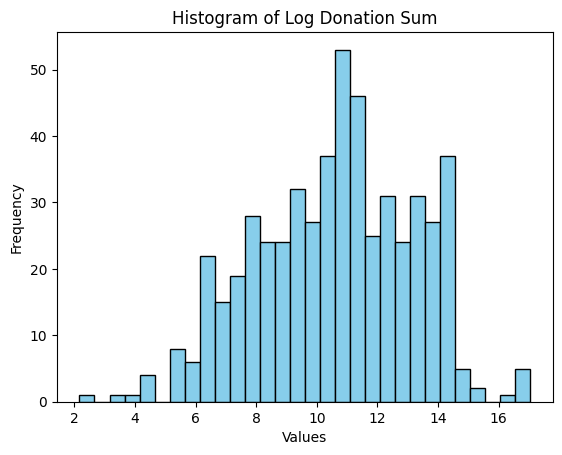

In [ ]:
#Log Donation Sum Column
column_data = np.log(dem_elect_df[dem_elect_df['Donation Sum']>0]['Donation Sum'])
plt.hist(column_data, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Log Donation Sum')
plt.show()

In [ ]:
donation_norm = (dem_elect_df["Donation Sum"] - np.mean(dem_elect_df["Donation Sum"])) / np.std(dem_elect_df["Donation Sum"])
endorsement_norm = (dem_elect_df["Endorsement Sum"] - np.mean(dem_elect_df["Endorsement Sum"])) / np.std(dem_elect_df["Endorsement Sum"])

**Frequentist Model on the whole dataset**

In [ ]:
freq_model = sm.GLM(np.log(dem_elect_df["Donation Sum"] + 1), exog = sm.add_constant(dem_elect_df[["Partisan Lean", "Primary %"]]),
                  family=sm.families.Gamma())
freq_res = freq_model.fit()
print(freq_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Donation Sum   No. Observations:                  779
Model:                            GLM   Df Residuals:                      776
Model Family:                   Gamma   Df Model:                            2
Link Function:           InversePower   Scale:                         0.56904
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Tue, 07 May 2024   Deviance:                       17162.
Time:                        22:23:28   Pearson chi2:                     442.
No. Iterations:                     7   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1562      0.006     26.731

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


**Random Forest Regression on whole Dataset**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

dem_elect_df['Donation Sum Log'] = np.log(dem_elect_df['Donation Sum'] + 1)
dem_elect_df['Primary % Log'] = np.log(dem_elect_df['Primary %'] + 1)
dem_elect_df['Partisan Lean Log'] = np.log(np.abs(dem_elect_df['Partisan Lean'] + 1))

rs = 101

train, test = train_test_split(dem_elect_df, test_size=0.3, random_state=rs)

forest_model = RandomForestRegressor(max_features=1)

# Selecting features for training
X_train = train[["Partisan Lean", "Primary %"]]
y_train = train['Donation Sum Log']

forest_model.fit(X_train, y_train)

train['forest_pred'] = forest_model.predict(X_train)
test['forest_pred'] = forest_model.predict(test[["Partisan Lean", "Primary %"]])

train_rmse = np.mean((train["forest_pred"] - train['Donation Sum Log']) ** 2) ** 0.5
test_rmse = np.mean((test["forest_pred"] - test['Donation Sum Log']) ** 2) ** 0.5

print("Training set error for Random Forest Regression:", train_rmse)
print("Test set error for Random Forest Regression:    ", test_rmse)


Training set error for Random Forest Regression: 2.0749400181289253
Test set error for Random Forest Regression:     5.484047910099321


**Linear Regression on whole dataset**

In [ ]:
linear_model = LinearRegression()
linear_model.fit(train[['Partisan Lean Log', 'Primary % Log']], train['Donation Sum Log'])
train['linear_pred'] = linear_model.predict(train[['Partisan Lean Log', 'Primary % Log']])
test['linear_pred'] = linear_model.predict(test[['Partisan Lean Log', 'Primary % Log']])

train_rmse = np.mean((train["linear_pred"] - train['Donation Sum Log']) ** 2) ** 0.5
test_rmse = np.mean((test["linear_pred"] - test['Donation Sum Log']) ** 2) ** 0.5

print("Training set error for linear model:", train_rmse)
print("Test set error for linear model:    ", test_rmse)

Training set error for linear model: 5.160067230464564
Test set error for linear model:     5.221493570951896


**Random Forest Regression and GLM Conditioned by State**

In [ ]:
from sklearn.metrics import mean_squared_error

#State Abreviations
very_blue_states_code = [usa_states[state] for state in very_blue_states]
very_red_states_code = [usa_states[state] for state in very_red_states]
most_no_lean_states_code = [usa_states[state] for state in most_no_lean_states]
blue_states_code = [usa_states[state] for state in blue_states]
red_states_code = [usa_states[state] for state in red_states]
neutral_states_code = [usa_states[state] for state in neutral_states]
battleground_states_code = [usa_states[state] for state in battleground_states]

#Create RandomForest Regression and GLM conditioned by state
#Outputs RMSE and Summary

leans = [very_blue_states_code, very_red_states_code, most_no_lean_states_code, blue_states_code, red_states_code, neutral_states_code, battleground_states_code]

type_of_state = ["very_blue_states", "very_red_states", "most_no_lean_states", "blue_states", "red_states", "neutral_states", "battleground_states"]

rs = 101

for i in range(7):
  print(type_of_state[i])
  print("States: ", leans[i])
  leanDF = dem_elect_df[dem_elect_df["State"].isin(leans[i])]
  print("Num of Candidates: ", leanDF.shape[0])

  train, test = train_test_split(leanDF, test_size=0.3, random_state=rs)

  #adding baseline RMSE (gives an idea of how good our RMSE is)
  np.random.seed(42)
  X = train[['Partisan Lean Log', 'Primary % Log']]
  y = train['Donation Sum Log']
  mean_donation_sum = np.mean(y)
  rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
  rf_model.fit(X, [mean_donation_sum] * len(y))
  y_pred = rf_model.predict(X)
  baseline_rmse = np.sqrt(mean_squared_error(y, y_pred))
  print("Baseline RMSE:", baseline_rmse)

  forest = RandomForestRegressor()
  forest.fit(train[['Partisan Lean Log', 'Primary % Log']], train['Donation Sum Log'])
  train['linear_pred'] = forest.predict(train[['Partisan Lean Log', 'Primary % Log']])
  test['linear_pred'] = forest.predict(test[['Partisan Lean Log', 'Primary % Log']])

  train_rmse = np.mean((train["linear_pred"] - train['Donation Sum Log']) ** 2) ** 0.5
  test_rmse = np.mean((test["linear_pred"] - test['Donation Sum Log']) ** 2) ** 0.5

  print("Training set error for random forest model: ", train_rmse)
  print("Test set error for random forest model: ", test_rmse)
  print("Forest feature importance: ", forest.feature_importances_)

  #Adding null model so we can compare deviances
  null_model = sm.GLM(np.log(leanDF["Donation Sum"] + 1), sm.add_constant(np.ones_like(leanDF[["Partisan Lean Log", "Primary % Log"]])), family=sm.families.Gaussian())
  null_result = null_model.fit()
  print("Null result summary: ", null_result.summary())

  freq_model = sm.GLM(np.log(leanDF["Donation Sum"] + 1), exog = sm.add_constant(leanDF[["Partisan Lean Log", "Primary % Log"]]),
                  family=sm.families.Gamma())
  freq_res = freq_model.fit()
  print(freq_res.summary())
  print("\n")

very_blue_states
States:  ['CA', 'CT', 'DE', 'DC', 'HI', 'IL', 'MD', 'MA', 'NJ', 'NY', 'OR', 'RI', 'VT']
Num of Candidates:  186
Baseline RMSE: 5.178973096755995
Training set error for random forest model:  2.0366938862313226
Test set error for random forest model:  4.545852136002447
Forest feature importance:  [0.42404988 0.57595012]
Null result summary:                   Generalized Linear Model Regression Results                  
Dep. Variable:           Donation Sum   No. Observations:                  186
Model:                            GLM   Df Residuals:                      185
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                          26.513
Method:                          IRLS   Log-Likelihood:                -567.47
Date:                Tue, 07 May 2024   Deviance:                       4864.5
Time:                        22:23:28   Pearson chi2:                 4.86e+03
No. Itera

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


Training set error for random forest model:  2.101346685087409
Test set error for random forest model:  5.115286836726236
Forest feature importance:  [0.37239536 0.62760464]
Null result summary:                   Generalized Linear Model Regression Results                  
Dep. Variable:           Donation Sum   No. Observations:                  131
Model:                            GLM   Df Residuals:                      130
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                          28.246
Method:                          IRLS   Log-Likelihood:                -403.93
Date:                Tue, 07 May 2024   Deviance:                       3656.1
Time:                        22:23:29   Pearson chi2:                 3.66e+03
No. Iterations:                     3   Pseudo R-squ. (CS):          7.145e-05
Covariance Type:            nonrobust                                         
              

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


Training set error for random forest model:  1.9174561151930944
Test set error for random forest model:  5.719178844956041
Forest feature importance:  [0.44300022 0.55699978]
Null result summary:                   Generalized Linear Model Regression Results                  
Dep. Variable:           Donation Sum   No. Observations:                  387
Model:                            GLM   Df Residuals:                      386
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                          28.170
Method:                          IRLS   Log-Likelihood:                -1194.5
Date:                Tue, 07 May 2024   Deviance:                       10867.
Time:                        22:23:29   Pearson chi2:                 1.09e+04
No. Iterations:                     3   Pseudo R-squ. (CS):          5.087e-06
Covariance Type:            nonrobust                                         
             

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


Training set error for random forest model:  2.0969798329498355
Test set error for random forest model:  5.285891041832927
Forest feature importance:  [0.43140046 0.56859954]
Null result summary:                   Generalized Linear Model Regression Results                  
Dep. Variable:           Donation Sum   No. Observations:                  478
Model:                            GLM   Df Residuals:                      477
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                          27.926
Method:                          IRLS   Log-Likelihood:                -1472.8
Date:                Tue, 07 May 2024   Deviance:                       13279.
Time:                        22:23:29   Pearson chi2:                 1.33e+04
No. Iterations:                     3   Pseudo R-squ. (CS):          1.358e-05
Covariance Type:            nonrobust                                         
             

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


Training set error for random forest model:  2.182715102471489
Test set error for random forest model:  5.432241337465265
Forest feature importance:  [0.39468637 0.60531363]
Null result summary:                   Generalized Linear Model Regression Results                  
Dep. Variable:           Donation Sum   No. Observations:                  275
Model:                            GLM   Df Residuals:                      274
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                          30.157
Method:                          IRLS   Log-Likelihood:                -855.63
Date:                Tue, 07 May 2024   Deviance:                       8116.6
Time:                        22:23:30   Pearson chi2:                 8.12e+03
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0002296
Covariance Type:            nonrobust                                         
              

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


Training set error for random forest model:  2.17224546071047
Test set error for random forest model:  5.613615471748705
Forest feature importance:  [0.47542505 0.52457495]
Null result summary:                   Generalized Linear Model Regression Results                  
Dep. Variable:           Donation Sum   No. Observations:                  286
Model:                            GLM   Df Residuals:                      285
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                          28.750
Method:                          IRLS   Log-Likelihood:                -885.57
Date:                Tue, 07 May 2024   Deviance:                       8192.0
Time:                        22:23:30   Pearson chi2:                 8.19e+03
No. Iterations:                     3   Pseudo R-squ. (CS):          6.878e-06
Covariance Type:            nonrobust                                         
               

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


Training set error for random forest model:  1.9427892695644355
Test set error for random forest model:  5.375812615679893
Forest feature importance:  [0.40121552 0.59878448]
Null result summary:                   Generalized Linear Model Regression Results                  
Dep. Variable:           Donation Sum   No. Observations:                  159
Model:                            GLM   Df Residuals:                      158
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                          25.313
Method:                          IRLS   Log-Likelihood:                -482.00
Date:                Tue, 07 May 2024   Deviance:                       3999.5
Time:                        22:23:31   Pearson chi2:                 4.00e+03
No. Iterations:                     3   Pseudo R-squ. (CS):          1.986e-05
Covariance Type:            nonrobust                                         
             

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


##Research Question 2: Bayesian Hierarchical Modeling

In [ ]:
#Generating the prior function-- the probability of winning (binary) against the donation sum
from scipy.stats import gamma, beta
import itertools
from ipywidgets import interact, interactive, FloatSlider
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display

def update_plot(alpha, beta_param):
    x = np.linspace(0, 1, 1000)
    pdf = beta.pdf(x, alpha, beta_param)
    plt.plot(x, pdf, 'b-', label='Beta({}, {})'.format(alpha, beta_param))
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title('Beta Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()

alpha_slider = widgets.FloatSlider(value=2, min=0.1, max=10.0, step=0.1, description='Alpha:')
beta_slider = widgets.FloatSlider(value=5, min=0.1, max=10.0, step=0.1, description='Beta:')

widgets.interactive(update_plot, alpha=alpha_slider, beta_param=beta_slider)

interactive(children=(FloatSlider(value=2.0, description='Alpha:', max=10.0, min=0.1), FloatSlider(value=5.0, …

In [ ]:
def plot_gamma(alpha_value, beta_value):
    x = np.arange(0, 500000, 100)
    y = gamma.pdf(x, alpha_value, beta_value)
    fig = plt.figure()
    plt.plot(x, y)
    plt.xlabel(r'$\theta_i$')
    plt.ylabel(r'$p(\theta_i)$')
    plt.title(r'Gamma distribution with parameters $\alpha$ and $\beta$')
    plt.ylim(0, 100000)
    plt.show()




#
interactive_plot = interactive(plot_gamma, alpha_value=(1, 500000, 20), beta_value=(1, 500000, 20))
interactive_plot


#Attempt #2

interactive(children=(IntSlider(value=249981, description='alpha_value', max=500000, min=1, step=20), IntSlide…

In [ ]:
import pymc as pm
import logging
logger = logging.getLogger('pymc')
logger.setLevel(logging.INFO)

In [ ]:
#Add column for number of candidates per state
candidate_count_per_state = dem_elect_df.groupby('State').size()
dem_elect_df['Candidates In State'] = dem_elect_df['State'].map(candidate_count_per_state)

dem_elect_df['Won Primary'] = dem_elect_df['Won Primary'].replace({'No': 0, 'Yes': 1})
dem_elect_df.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Partisan Lean,Primary %,Won Primary,...,Last Name,Donation Sum,Donation Count,Donation Average,Endorsement Sum,Party,Donation Sum Log,Primary % Log,Partisan Lean Log,Candidates In State
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,-28.879999,3.42,0,...,None,0.00,0,NaN,0,Democrat,0.000000,1.486140,3.32791,16
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,-28.879999,1.74,0,...,Countryman,0.00,0,NaN,0,Democrat,0.000000,1.007958,3.32791,16
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,-28.879999,3.27,0,...,Smith,1486352.16,25,59454.0864,0,Democrat,14.211836,1.451614,3.32791,16
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,-28.879999,8.00,0,...,Fields,0.00,0,NaN,0,Democrat,0.000000,2.197225,3.32791,16
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,-28.879999,28.98,0,...,Cobb,18681.00,4,4670.2500,0,Democrat,9.835316,3.400530,3.32791,16


### Bayesian Hierarchical Model Attempt

In [ ]:
nonzero_donations_and_primary['Won Primary'] = nonzero_donations_and_primary['Won Primary'].replace(
    {'No': 0, 'Yes': 1})

<ipython-input-166-dd78d4b4bc16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzero_donations_and_primary['Won Primary'] = nonzero_donations_and_primary['Won Primary'].replace(


In [ ]:
nonzero_donations_and_primary['Office Type'].value_counts()

Office Type
Representative    810
Senator            91
Governor           69
Name: count, dtype: int64

In [ ]:
string_to_cat = {}
for cat, string_list in state_partisan_lean.items():
  for item in string_list:
    string_to_cat[item] = cat

In [ ]:
nonzero_donations_and_primary['Partisanship'] = nonzero_donations_and_primary['State'].map(string_to_cat)

<ipython-input-169-8431754182c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzero_donations_and_primary['Partisanship'] = nonzero_donations_and_primary['State'].map(string_to_cat)


In [ ]:
partisanship_groups = nonzero_donations_and_primary['Partisanship'].unique()
party_groups = nonzero_donations_and_primary['Party'].unique()

partisanship_idx = pd.Categorical(nonzero_donations_and_primary['Partisanship']).codes
party_idx = pd.Categorical(nonzero_donations_and_primary['Party']).codes

with pm.Model() as hierarchical_model:
    group_mu_prior_mean = nonzero_donations_and_primary['Won Primary'].mean()
    group_mu_prior_std = nonzero_donations_and_primary['Won Primary'].std()
    group_mu = pm.Normal('group_mu',
                         mu=group_mu_prior_mean,
                         sigma=group_mu_prior_std,
                         shape=len(partisanship_groups))
    group_sigma = pm.HalfNormal('group_sigma', sigma=5)

    group_effect = pm.Normal('group_effect',
                             mu=group_mu[partisanship_idx],
                             sigma=group_sigma,
                             shape=len(nonzero_donations_and_primary))

    party_mu = pm.Normal('party_mu', mu=0, sigma=10, shape=len(party_groups))
    party_effect = pm.Normal('party_effect',
                             mu=party_mu[party_idx],
                             sigma=5,
                             shape=len(nonzero_donations_and_primary))

    beta_donation = pm.Normal('beta_donation', mu=0, sigma=5)
    intercept = pm.Normal('intercept', mu=0, sigma=10)

    donation_size = nonzero_donations_and_primary['Donation Sum (Log)'].values
    election_result = intercept + beta_donation * donation_size + group_effect + party_effect

    likelihood = pm.Bernoulli('likelihood', p=pm.math.sigmoid(election_result),
                              observed=nonzero_donations_and_primary['Won Primary'])

    trace = pm.sample(2000, chains=2, return_inferencedata=True)

pm.summary(trace)


INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Sequential sampling (2 chains in 1 job)
INFO:pymc.sampling.mcmc:NUTS: [group_mu, group_sigma, group_effect, party_mu, party_effect, beta_donation, intercept]


INFO:pymc.sampling.mcmc:Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 300 seconds.
INFO:pymc.stats.convergence:We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
group_mu[0],-0.084,0.395,-0.840,0.641,0.014,0.010,839.0,1500.0,1.00
group_mu[1],0.328,0.403,-0.418,1.084,0.013,0.009,902.0,1654.0,1.00
group_mu[2],0.824,0.446,-0.007,1.660,0.010,0.007,1899.0,2025.0,1.00
group_effect[0],-1.870,4.822,-11.844,5.722,0.518,0.368,125.0,185.0,1.02
group_effect[1],-1.252,4.761,-10.823,7.100,0.369,0.285,255.0,324.0,1.02
...,...,...,...,...,...,...,...,...,...
party_effect[968],-4.855,7.076,-19.068,7.445,1.645,1.182,17.0,64.0,1.11
party_effect[969],1.236,7.323,-13.219,14.529,1.899,1.370,15.0,71.0,1.12
beta_donation,0.409,0.143,0.164,0.702,0.028,0.020,27.0,88.0,1.05
intercept,-4.638,5.698,-15.318,7.290,1.435,1.034,14.0,42.0,1.14


In [ ]:
nonzero_donations_and_primary['Partisanship'].unique()

array(['Republican-leaning', 'Battleground', 'Democrat-leaning'],
      dtype=object)

INFO:pymc.sampling.forward:Sampling: [beta_donation, group_mu, party_mu]


Prior distributions


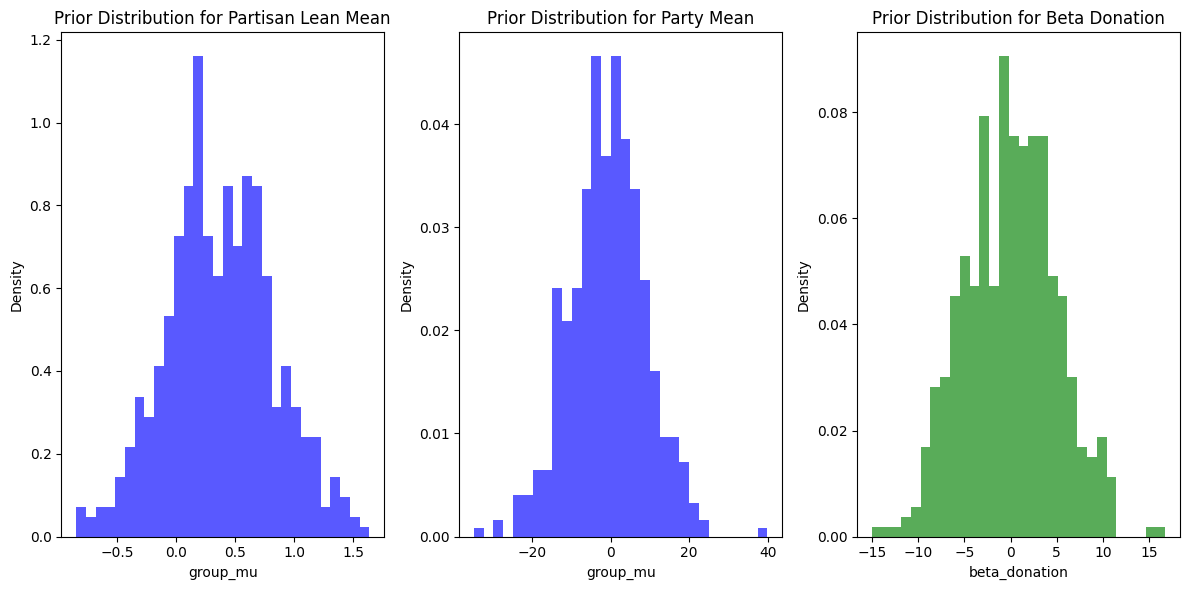

In [ ]:
with pm.Model() as model:
    group_mu_prior_mean = nonzero_donations_and_primary['Won Primary'].mean()
    group_mu_prior_std = nonzero_donations_and_primary['Won Primary'].std()
    group_mu = pm.Normal('group_mu',
                         mu=group_mu_prior_mean,
                         sigma=group_mu_prior_std)
    party_mu = pm.Normal('party_mu', mu=0, sigma=10)
    beta_donation = pm.Normal('beta_donation', mu=0, sigma=5)

    prior_checks = pm.sample_prior_predictive(samples=500)

print('Prior distributions')
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(prior_checks.prior["group_mu"].values.flatten(),
         bins=30, density=True, alpha=0.65, color='blue')
plt.title('Prior Distribution for Partisan Lean Mean')
plt.xlabel('group_mu')
plt.ylabel('Density')

plt.subplot(1, 3, 2)
plt.hist(prior_checks.prior["party_mu"].values.flatten(),
         bins=30, density=True, alpha=0.65, color='blue')
plt.title('Prior Distribution for Party Mean')
plt.xlabel('group_mu')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
plt.hist(prior_checks.prior['beta_donation'].values.flatten(),
         bins=30, density=True, alpha=0.65, color='green')
plt.title('Prior Distribution for Beta Donation')
plt.xlabel('beta_donation')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


`group_mu_0` corresponds to Republican-leaning states.
`group_mu_1` corresponds to battle ground states.
`group_mu_2` corresponds to democratic leaning states.

/usr/local/lib/python3.10/dist-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (1948) in plot_posterior, generating only 40 plots
  warnings.warn(


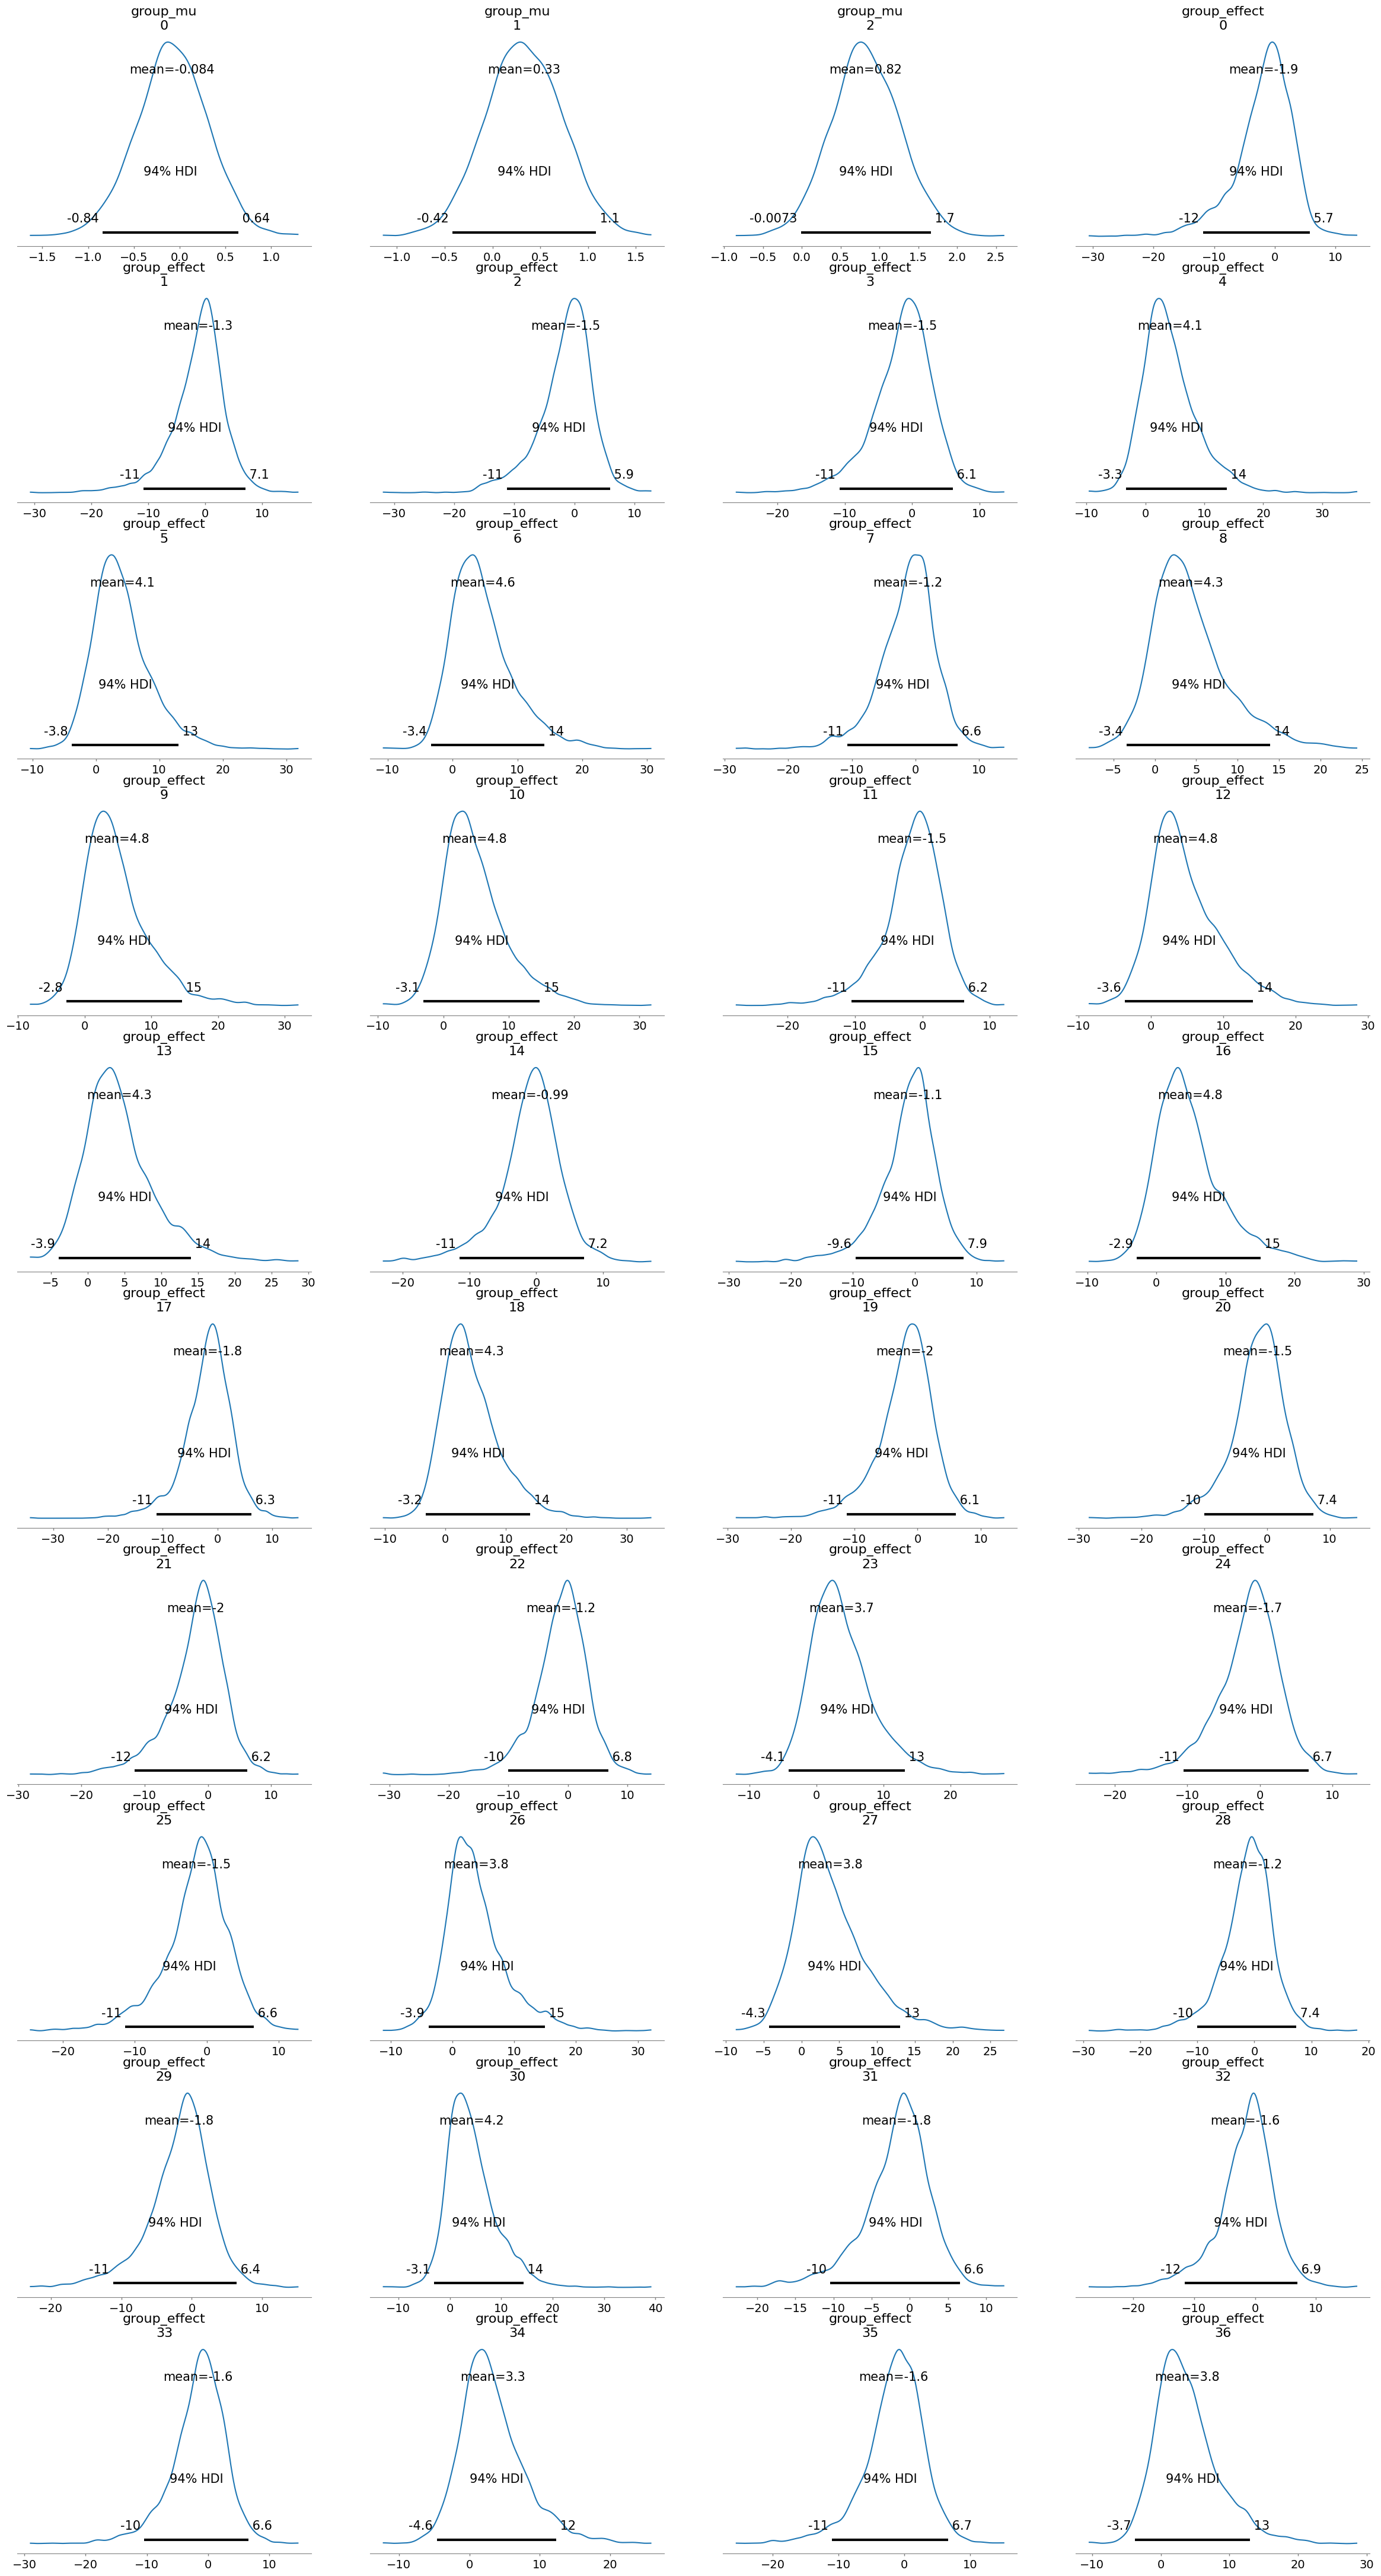

In [ ]:
with model:
    az.plot_posterior(trace)
    plt.show()

In [ ]:
#### End